<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-problem" data-toc-modified-id="Setup-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup problem</a></span></li><li><span><a href="#Generate-simulations" data-toc-modified-id="Generate-simulations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate simulations</a></span></li><li><span><a href="#The-discrepancy-as-a-stochastic-process" data-toc-modified-id="The-discrepancy-as-a-stochastic-process-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The discrepancy as a stochastic process</a></span><ul class="toc-item"><li><span><a href="#One-realization" data-toc-modified-id="One-realization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>One realization</a></span></li><li><span><a href="#Mean-and-quantiles" data-toc-modified-id="Mean-and-quantiles-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Mean and quantiles</a></span></li></ul></li><li><span><a href="#Effective-likelihood-for-rejection-sampling" data-toc-modified-id="Effective-likelihood-for-rejection-sampling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Effective likelihood for rejection sampling</a></span></li><li><span><a href="#Regression-of-the-discrepancy-and-BOLFI-effective-likelihood" data-toc-modified-id="Regression-of-the-discrepancy-and-BOLFI-effective-likelihood-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regression of the discrepancy and BOLFI effective likelihood</a></span><ul class="toc-item"><li><span><a href="#Gaussian-process-regression-of-the-discrepancy" data-toc-modified-id="Gaussian-process-regression-of-the-discrepancy-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Gaussian process regression of the discrepancy</a></span></li><li><span><a href="#BOLFI-effective-likelihood" data-toc-modified-id="BOLFI-effective-likelihood-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BOLFI effective likelihood</a></span></li><li><span><a href="#Dependence-on-the-noise-level-of-the-BOLFI-effective-likelihood" data-toc-modified-id="Dependence-on-the-noise-level-of-the-BOLFI-effective-likelihood-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Dependence on the noise level of the BOLFI effective likelihood</a></span></li></ul></li></ul></div>

# Discrepancy and effective likelihood (non-parametric approximation)

Florent Leclercq<br>
Imperial Centre for Inference and Cosmology, Imperial College London<br>
<a href="mailto:florent.leclercq@polytechnique.org">florent.leclercq@polytechnique.org</a>

In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline
plt.rc('lines', linewidth=2)
colors=[plt.cm.Set2(i) for i in np.linspace(0, 1, 8)]
colors_2=[plt.cm.tab10(i) for i in np.linspace(0, 1, 10)]
plt.rc('axes', prop_cycle=cycler('color', colors))

## Setup problem

In [2]:
def simulator(mu, sigma, batch_size=1, random_state=None):
    mu, sigma = np.atleast_1d(mu, sigma)
    return ss.norm.rvs(mu[:, None], sigma[:, None], size=(batch_size, 10), random_state=random_state)

def mean(y):
    return np.mean(y, axis=1)

def var(y):
    return np.var(y, axis=1)

def discrepancy(d, d0):
    return (d-d0)**2

def sample(mu, sigma, N):
    sims=np.zeros(N)
    for j_ in range(N):
        y_=simulator(mu, sigma)
        sims[j_]+=mean(y_)
    return np.mean(sims)

In [3]:
# Set the batch size and number of simulations per mu
batch_size=10
N=2

# Set the generating parameters that we will try to infer
mean0 = 2
sigma0 = 1

# Generate some data (using a fixed seed here)
np.random.seed(234897)
y0 = simulator(mean0, sigma0)
print(y0)
d0=mean(y0)
print(d0)

[[ 1.40440613  2.15733363  4.03025858  0.38635054  1.94687808  2.29341463
   2.79857016  1.92131005  3.98223683  2.13973219]]
[ 2.30604908]


In [4]:
# Set the prior
mu = ss.uniform(-2,6)

## Generate simulations

In [5]:
# Generate some data points
N_sims=100
mu_sims=mu.rvs(N_sims)
sims=np.zeros(N_sims)
for i_ in range(N_sims):
    sims[i_]=sample(mu_sims[i_], sigma0, N)
S1_sims=discrepancy(sims,d0)

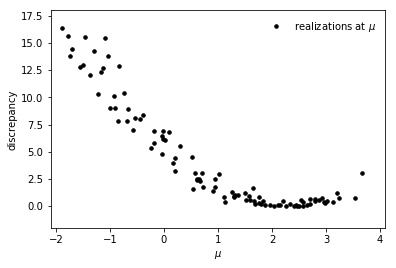

In [6]:
(xmin,xmax)=(-2.1,4.1)
(ymin,ymax)=(-2,18)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_sims, S1_sims, linestyle="", marker="o", markersize=3.5, color="black", label="realizations at $\mu$")
plt.xlabel("$\mu$")
plt.ylabel("discrepancy")
plt.legend(frameon=False)

## The discrepancy as a stochastic process

In [7]:
def discrepancy_g(mu, d0, g):
    return (d0 - mu - g)**2

### One realization

In [8]:
# Get the synthetic likelihood for one particular realization
sigma_g=1/np.sqrt(N*batch_size)
g=ss.norm(0, sigma_g).rvs()
(xmin,xmax)=(-2.1,4.1)
mu_arr=np.linspace(xmin,xmax,200)
discrepancy_g_one_res=discrepancy_g(mu_arr, d0, g)

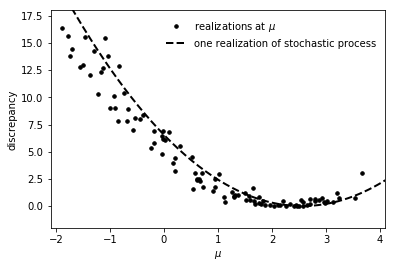

In [9]:
(xmin,xmax)=(-2.1,4.1)
(ymin,ymax)=(-2,18)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_sims, S1_sims, linestyle="", marker="o", markersize=3.5, color="black", label="realizations at $\mu$")
plt.plot(mu_arr, discrepancy_g_one_res, linestyle="--", color="black", label="one realization of stochastic process")
plt.xlabel("$\mu$")
plt.ylabel("discrepancy")
plt.legend(frameon=False)

### Mean and quantiles

In [10]:
g_m=ss.norm(0, sigma_g).ppf(0.1) # g value for the 0.1 quantile
g_p=ss.norm(0, sigma_g).ppf(0.9) # g value for the 0.9 quantile
g_0=ss.norm(0, sigma_g).ppf(0.5) # g value for the mean
discrepancy_g_m=discrepancy_g(mu_arr, d0, g_m)
discrepancy_g_p=discrepancy_g(mu_arr, d0, g_p)
discrepancy_g_0=discrepancy_g(mu_arr, d0, g_0)

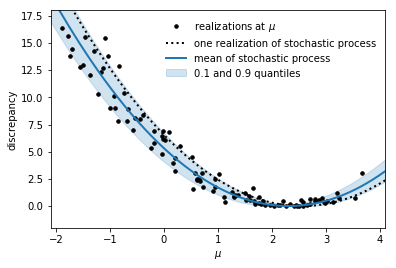

In [11]:
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_sims, S1_sims, linestyle="", marker="o", markersize=3.5, color="black", label="realizations at $\mu$")
plt.plot(mu_arr, discrepancy_g_one_res, linestyle=":", color="black", label="one realization of stochastic process")
plt.plot(mu_arr, discrepancy_g_0, linestyle="-", color=colors_2[0], label="mean of stochastic process")
plt.fill_between(mu_arr, discrepancy_g_m, discrepancy_g_p, alpha=0.2, facecolor=colors_2[0], edgecolor=colors_2[0], label="0.1 and 0.9 quantiles")
plt.xlabel("$\mu$")
plt.ylabel("discrepancy")
plt.legend(frameon=False)

## Effective likelihood for rejection sampling

In [12]:
def likelihood(mu, d0, batch_size):
    return np.exp( - 1/2.*np.log(2*np.pi/batch_size) - batch_size/2.*(d0 - mu)**2 )

In [13]:
def effective_likelihood(mu, d0, batch_size, threshold):
    (n,h)=(batch_size,threshold)
    return ss.norm(0,1).cdf(np.sqrt(n)*(d0-mu)+np.sqrt(n*h)) - ss.norm(0,1).cdf(np.sqrt(n)*(d0-mu)-np.sqrt(n*h))
# equation (27) in Gutmann & Corander 2016

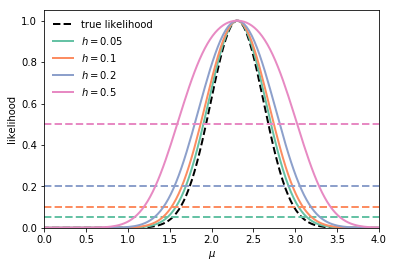

In [14]:
(xmin,xmax)=(0,4)
(ymin,ymax)=(0,1.05)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_arr, likelihood(mu_arr, d0, batch_size)/likelihood(mu_arr, d0, batch_size).max(), linestyle="--", color="black", label="true likelihood")
plt.plot([xmin,xmax], [0.05,0.05], linestyle="--", color=colors[0])
plt.plot(mu_arr, effective_likelihood(mu_arr, d0, batch_size, 0.05)/effective_likelihood(mu_arr, d0, batch_size, 0.05).max(), linestyle="-", label="$h=0.05$")
plt.plot([xmin,xmax], [0.1,0.1], linestyle="--", color=colors[1])
plt.plot(mu_arr, effective_likelihood(mu_arr, d0, batch_size, 0.1)/effective_likelihood(mu_arr, d0, batch_size, 0.1).max(), linestyle="-", label="$h=0.1$")
plt.plot([xmin,xmax], [0.2,0.2], linestyle="--", color=colors[2])
plt.plot(mu_arr, effective_likelihood(mu_arr, d0, batch_size, 0.2)/effective_likelihood(mu_arr, d0, batch_size, 0.2).max(), linestyle="-", label="$h=0.2$")
plt.plot([xmin,xmax], [0.5,0.5], linestyle="--", color=colors[3])
plt.plot(mu_arr, effective_likelihood(mu_arr, d0, batch_size, 0.5)/effective_likelihood(mu_arr, d0, batch_size, 0.5).max(), linestyle="-", label="$h=0.5$")
plt.xlabel("$\mu$")
plt.ylabel("likelihood")
plt.legend(frameon=False)

## Regression of the discrepancy and BOLFI effective likelihood

### Gaussian process regression of the discrepancy

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel as W, Matern as M

In [16]:
# Mesh the input space for evaluations of the real function, the prediction and its MSE
x = np.atleast_2d(mu_arr).T

# Instanciate a Gaussian Process model
c1=1
c2=1
c3=1
kernel = C(c1, (1e-10, 1e10)) * RBF(c2, (1e-10, 1e10)) + W(c3, (1e-10, 1e5))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

# Fit to data using Maximum Likelihood Estimation of the parameters
X = np.atleast_2d(mu_sims).T
gp.fit(X, S1_sims)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, y_var = gp.predict(x, return_std=True)
y_pred = y_pred.squeeze()
y_sigma = np.sqrt(y_var).squeeze()

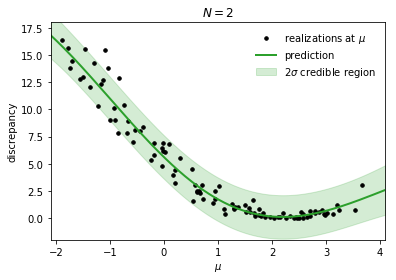

In [17]:
(xmin,xmax)=(-2.1,4.1)
(ymin,ymax)=(-2,18)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_sims, S1_sims, linestyle="", marker="o", markersize=3.5, color="black", label="realizations at $\mu$")
plt.plot(x, y_pred, color=colors_2[2], label="prediction")
plt.fill_between(x.T[0], y_pred-2.*y_sigma, y_pred+2.*y_sigma, alpha=0.2, facecolor=colors_2[2], edgecolor=colors_2[2], label="$2\sigma$ credible region")
plt.title("$N=2$")
plt.xlabel("$\mu$")
plt.ylabel("discrepancy")
plt.legend(frameon=False)

### BOLFI effective likelihood

In [18]:
def effective_likelihood_regression(y_pred, sigma, threshold):
    h=threshold
    return ss.norm(0,1).cdf((h-y_pred)/sigma)
# equation (47) in Gutmann & Corander 2016

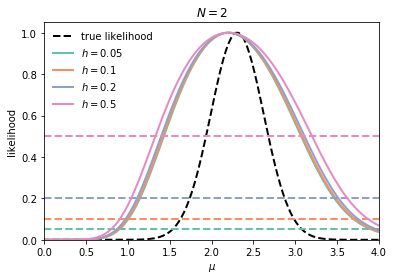

In [19]:
(xmin,xmax)=(0,4)
(ymin,ymax)=(0,1.05)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_arr, likelihood(mu_arr, d0, batch_size)/likelihood(mu_arr, d0, batch_size).max(), linestyle="--", color="black", label="true likelihood")
plt.plot([xmin,xmax], [0.05,0.05], linestyle="--", color=colors[0])
plt.plot(x, effective_likelihood_regression(y_pred, y_sigma, 0.05)/effective_likelihood_regression(y_pred, y_sigma, 0.05).max(), label="$h=0.05$")
plt.plot([xmin,xmax], [0.1,0.1], linestyle="--", color=colors[1])
plt.plot(x, effective_likelihood_regression(y_pred, y_sigma, 0.1)/effective_likelihood_regression(y_pred, y_sigma, 0.1).max(), label="$h=0.1$")
plt.plot([xmin,xmax], [0.2,0.2], linestyle="--", color=colors[2])
plt.plot(x, effective_likelihood_regression(y_pred, y_sigma, 0.2)/effective_likelihood_regression(y_pred, y_sigma, 0.2).max(), label="$h=0.2$")
plt.plot([xmin,xmax], [0.5,0.5], linestyle="--", color=colors[3])
plt.plot(x, effective_likelihood_regression(y_pred, y_sigma, 0.5)/effective_likelihood_regression(y_pred, y_sigma, 0.5).max(), label="$h=0.5$")
plt.title("$N=2$")
plt.xlabel("$\mu$")
plt.ylabel("likelihood")
plt.legend(frameon=False)

### Dependence on the noise level of the BOLFI effective likelihood

In [20]:
# Reset number of simulations per mu
N=10

# Generate some data points
N_sims=100
mu_sims=mu.rvs(N_sims)
sims=np.zeros(N_sims)
for i_ in range(N_sims):
    sims[i_]=sample(mu_sims[i_], sigma0, N)
S1_sims=discrepancy(sims,d0)

# Instanciate a Gaussian Process model
c1=1
c2=1
c3=1
kernel = C(c1, (1e-10, 1e10)) * RBF(c2, (1e-10, 1e10)) + W(c3, (1e-10, 1e5))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

# Fit to data using Maximum Likelihood Estimation of the parameters
X = np.atleast_2d(mu_sims).T
gp.fit(X, S1_sims)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred_N10, y_var_N10 = gp.predict(x, return_std=True)
y_pred_N10 = y_pred_N10.squeeze()
y_sigma_N10 = np.sqrt(y_var_N10).squeeze()

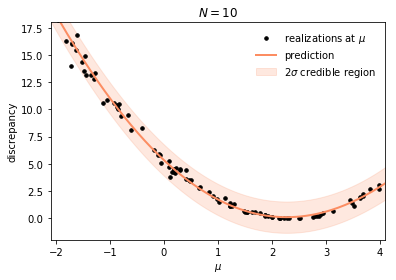

In [21]:
(xmin,xmax)=(-2.1,4.1)
(ymin,ymax)=(-2,18)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_sims, S1_sims, linestyle="", marker="o", markersize=3.5, color="black", label="realizations at $\mu$")
plt.plot(x, y_pred_N10, color=colors[1], label="prediction")
plt.fill_between(x.T[0], y_pred_N10-2.*y_sigma_N10, y_pred_N10+2.*y_sigma_N10, alpha=0.2, facecolor=colors[1], edgecolor=colors[1], label="$2\sigma$ credible region")
plt.title("$N=10$")
plt.xlabel("$\mu$")
plt.ylabel("discrepancy")
plt.legend(frameon=False)

In [22]:
# Reset number of simulations per mu
N=100

# Generate some data points
N_sims=100
mu_sims=mu.rvs(N_sims)
sims=np.zeros(N_sims)
for i_ in range(N_sims):
    sims[i_]=sample(mu_sims[i_], sigma0, N)
S1_sims=discrepancy(sims,d0)

# Instanciate a Gaussian Process model
c1=1
c2=1
c3=1
kernel = C(c1, (1e-10, 1e10)) * RBF(c2, (1e-10, 1e10)) + W(c3, (1e-10, 1e5))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

# Fit to data using Maximum Likelihood Estimation of the parameters
X = np.atleast_2d(mu_sims).T
gp.fit(X, S1_sims)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred_N100, y_var_N100 = gp.predict(x, return_std=True)
y_pred_N100 = y_pred_N100.squeeze()
y_sigma_N100 = np.sqrt(y_var_N100).squeeze()

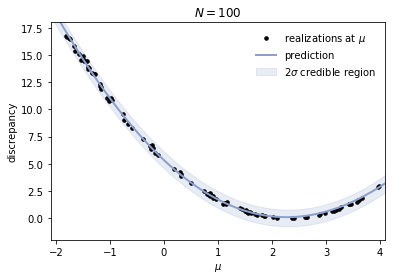

In [23]:
(xmin,xmax)=(-2.1,4.1)
(ymin,ymax)=(-2,18)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_sims, S1_sims, linestyle="", marker="o", markersize=3.5, color="black", label="realizations at $\mu$")
plt.plot(x, y_pred_N10, color=colors[2], label="prediction")
plt.fill_between(x.T[0], y_pred_N100-2.*y_sigma_N100, y_pred_N100+2.*y_sigma_N100, alpha=0.2, facecolor=colors[2], edgecolor=colors[2], label="$2\sigma$ credible region")
plt.title("$N=100$")
plt.xlabel("$\mu$")
plt.ylabel("discrepancy")
plt.legend(frameon=False)

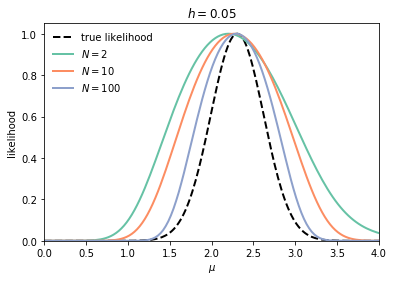

In [24]:
(xmin,xmax)=(0,4)
(ymin,ymax)=(0,1.05)
mu_arr=np.linspace(xmin,xmax,200)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_arr, likelihood(mu_arr, d0, batch_size)/likelihood(mu_arr, d0, batch_size).max(), linestyle="--", color="black", label="true likelihood")
plt.plot(x, effective_likelihood_regression(y_pred, y_sigma, 0.05)/effective_likelihood_regression(y_pred, y_sigma, 0.05).max(), label="$N=2$")
plt.plot(x, effective_likelihood_regression(y_pred_N10, y_sigma_N10, 0.05)/effective_likelihood_regression(y_pred_N10, y_sigma_N10, 0.05).max(), label="$N=10$")
plt.plot(x, effective_likelihood_regression(y_pred_N100, y_sigma_N100, 0.05)/effective_likelihood_regression(y_pred_N100, y_sigma_N100, 0.05).max(), label="$N=100$")
plt.title("$h=0.05$")
plt.xlabel("$\mu$")
plt.ylabel("likelihood")
plt.legend(frameon=False)